In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [27]:
temp=pd.read_csv('cpi.csv')
labels=np.array(temp.keys()[3:-2])  #Market basket
print labels
data=np.array(temp.as_matrix())[:, :-2]  #CPIs of the market basket
print data
print np.shape(data)
labels=np.concatenate([labels[:20], labels[21:]])
#Excluding the housing data as some parts of the data is missing
housing_rural=data[0::3, 20]
print housing_rural
cpis_rural=np.concatenate([data[0::3, 3:20], data[0::3, 21:]], 1)    #Rural CPIs excluding housing
housing_urban=data[1::3, 20]
cpis_urban=np.concatenate([data[1::3, 3:20], data[1::3, 21:]], 1)    #Rural CPIs excluding housing
housing_overall=data[2::3, 20]
cpis_overall=np.concatenate([data[2::3, 3:20], data[2::3, 21:]], 1)    #Overall CPIs excluding housing
gi_rural=data[0::3, -1]
gi_urban=data[1::3, -1]
gi_overall=data[2::3, -1]
#print labels
print np.shape(cpis_rural)

['Cereals and products' 'Meat and fish' 'Egg' 'Milk and products'
 'Oils and fats' 'Fruits' 'Vegetables' 'Pulses and products'
 'Sugar and Confectionery' 'Spices' 'Non-alcoholic beverages'
 'Prepared meals, snacks, sweets etc.' 'Food and beverages'
 'Pan, tobacco and intoxicants' 'Clothing' 'Footwear'
 'Clothing and footwear' 'Housing' 'Fuel and light'
 'Household goods and services' 'Health' 'Transport and communication'
 'Recreation and amusement' 'Education' 'Personal care and effects'
 'Miscellaneous' 'General index']
[['Rural' 2013 'January' ... 104.7 104.0 105.1]
 ['Urban' 2013 'January' ... 104.3 103.7 104.0]
 ['Rural+Urban' 2013 'January' ... 104.5 103.9 104.6]
 ...
 ['Rural' 2017 'July' ... 124.4 128.6 136.2]
 ['Urban' 2017 'July' ... 122.4 123.0 131.8]
 ['Rural+Urban' 2017 'July' ... 123.6 125.9 134.2]]
(165, 30)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan na

In [24]:
print gi_rural

[105.1 105.8 106.0 106.4 107.2 108.9 110.7 112.1 114.2 115.5 117.4 115.5
 114.2 114.0 114.6 115.4 116.0 117.0 119.5 120.7 120.9 121.0 121.1 120.3
 120.3 120.6 121.1 121.5 122.4 124.1 124.7 126.1 127.0 127.7 128.3 127.9
 128.1 127.9 128.0 129.0 130.3 131.9 133.0 133.5 133.4 133.8 133.6 132.8
 132.4 132.6 132.8 132.9 133.3 133.9 136.2]


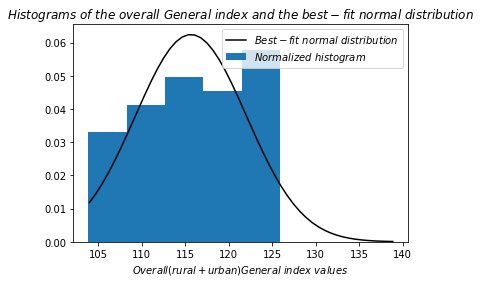

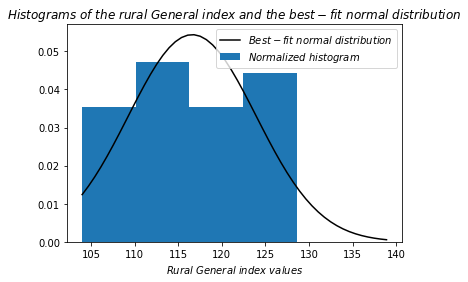

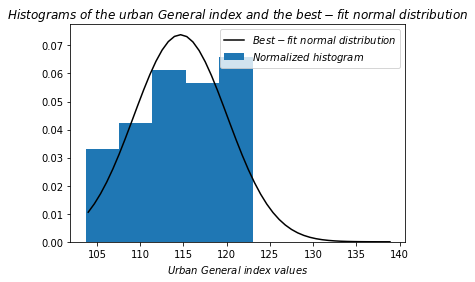

In [5]:
plt.figure(0)
plt.hist(gi_overall, np.histogram(gi_overall, bins='fd')[1], normed=True)    #Setting bins using Freedman rule
gi_overall_mu, gi_overall_sigma=stats.norm.fit(gi_overall)
gi_overall_range=np.linspace(104, 138.88)
plt.plot(gi_overall_range, stats.norm(gi_overall_mu, gi_overall_sigma).pdf(gi_overall_range), 'k')
plt.title('$Histograms\ of\ the\ overall\ General\ index\ and\ the\ best-fit\ normal\ distribution$')
plt.xlabel('$Overall (rural+urban) General\ index\ values$')
plt.legend(['$Best-fit\ normal\ distribution$', '$Normalized\ histogram$'])

plt.figure(1)
plt.hist(gi_rural, np.histogram(gi_rural, bins='fd')[1], normed=True)    #Setting bins using Freedman rule
gi_rural_mu, gi_rural_sigma=stats.norm.fit(gi_rural)
gi_rural_range=np.linspace(104, 138.88)
plt.plot(gi_rural_range, stats.norm(gi_rural_mu, gi_rural_sigma).pdf(gi_rural_range), 'k')
plt.title('$Histograms\ of\ the\ rural\ General\ index\ and\ the\ best-fit\ normal\ distribution$')
plt.xlabel('$Rural\ General\ index\ values$')
plt.legend(['$Best-fit\ normal\ distribution$', '$Normalized\ histogram$'])

plt.figure(2)
plt.hist(gi_urban, np.histogram(gi_urban, bins='fd')[1], normed=True)    #Setting bins using Freedman rule
gi_urban_mu, gi_urban_sigma=stats.norm.fit(gi_urban)
gi_urban_range=np.linspace(104, 138.88)
plt.plot(gi_urban_range, stats.norm(gi_urban_mu, gi_urban_sigma).pdf(gi_urban_range), 'k')
plt.title('$Histograms\ of\ the\ urban\ General\ index\ and\ the\ best-fit\ normal\ distribution$')
plt.xlabel('$Urban\ General\ index\ values$')
plt.legend(['$Best-fit\ normal\ distribution$', '$Normalized\ histogram$'])

plt.show()

In [6]:
rvs_gi_overall=stats.norm(gi_overall_mu, gi_overall_sigma).rvs(1000000)
k, p=stats.ks_2samp(gi_overall, rvs_gi_overall)
print 'Kolomogrov-Smirnov test to the overall (rural+urban) general index values:'
print 'k =', k, ' p =', p
rvs_gi_rural=stats.norm(gi_rural_mu, gi_rural_sigma).rvs(1000000)
k, p=stats.ks_2samp(gi_rural, rvs_gi_overall)
print 'Kolomogrov-Smirnov test to the rural general index values:'
print 'k =', k, ' p =', p
rvs_gi_urban=stats.norm(gi_urban_mu, gi_urban_sigma).rvs(1000000)
k, p=stats.ks_2samp(gi_urban, rvs_gi_overall)
print 'Kolomogrov-Smirnov test to the urban general index values:'
print 'k =', k, ' p =', p

Kolomogrov-Smirnov test to the overall (rural+urban) general index values:
k = 0.07333745454545448  p = 0.9189922630474986
Kolomogrov-Smirnov test to the rural general index values:
k = 0.13792345454545452  p = 0.22820184728431955
Kolomogrov-Smirnov test to the urban general index values:
k = 0.12599000000000005  p = 0.32585686015569965


In [33]:
r_spearman_rural, p_spearman_rural=stats.spearmanr(cpis_rural, axis=0)
print np.shape(r_spearman_rural)
r_spearman_urban, p_spearman_urban=stats.spearmanr(cpis_urban, axis=0)
r_spearman_overall, p_spearman_overall=stats.spearmanr(cpis_overall, axis=0)
r_spearman_gi=r_spearman_overall[-1, :]
r_spearman_overall=r_spearman_overall[:-1, :-1]
print r_spearman_overall

(26, 26)
[[ 1.          0.97633222  0.85837228  0.99819612  0.98377989  0.89166712
   0.16590901  0.87853806  0.36434822  0.97553892  0.9982502   0.99826828
   0.9468728   0.99826828  0.99826828  0.99826828  0.99826828  0.99631968
   0.99826828  0.99826828  0.86113319  0.9982502   0.99799762  0.99020264
   0.9983944 ]
 [ 0.97633222  1.          0.83035957  0.97860673  0.9555271   0.92163513
   0.21859442  0.88577613  0.36361341  0.95358695  0.97855223  0.97867889
   0.95298999  0.97867889  0.97867889  0.97867889  0.97867889  0.97546544
   0.97867889  0.97867889  0.86514383  0.97855223  0.97822714  0.97421743
   0.97925424]
 [ 0.85837228  0.83035957  1.          0.85576664  0.85620715  0.68715044
   0.13433401  0.80987949  0.35460123  0.87793614  0.85520477  0.85511718
   0.82941835  0.85511718  0.85511718  0.85511718  0.85511718  0.8597023
   0.85511718  0.85511718  0.73902374  0.85520477  0.85424598  0.85246671
   0.85378703]
 [ 0.99819612  0.97860673  0.85576664  1.          0.982085

In [29]:
l=np.size(cpis_rural, 1)    #No. of features in the market basket
uncorr_rural_labels=np.empty(0)
uncorr_urban_labels=np.empty(0)
uncorr_overall_labels=np.empty(0)
for i in range(l-1):
    for j in range(i+1, l):
        if r_spearman_rural[i, j]<0.5:
            uncorr_rural_labels=np.append(uncorr_rural_labels, [labels[i], labels[j]])
        if r_spearman_urban[i, j]<0.5:
            uncorr_urban_labels=np.append(uncorr_urban_labels, [labels[i], labels[j]])
        if r_spearman_overall[i, j]<0.5:
            uncorr_overall_labels=np.append(uncorr_overall_labels, [labels[i], labels[j]])
uncorr_rural_labels=np.reshape(uncorr_rural_labels, [-1, 2])
print 'The goods and services in the market basket for which the CPIs in the rural sector are not correlated are', uncorr_rural_labels
np.savetxt('uncorrelated_rural.txt', uncorr_rural_labels, fmt='%28s', delimiter='\t\t')
uncorr_urban_labels=np.reshape(uncorr_urban_labels, [-1, 2])
np.savetxt('uncorrelated_urban.txt', uncorr_urban_labels, fmt='%28s', delimiter='\t\t')
print 'The goods and services in the market basket for which the CPIs in the urban sector are not correlated are', uncorr_urban_labels
uncorr_overall_labels=np.reshape(uncorr_overall_labels, [-1, 2])
np.savetxt('uncorrelated_overall.txt', uncorr_overall_labels, fmt='%28s', delimiter='\t\t')
print 'The goods and services in the market basket for which the overall CPIs (rural+urban) are not correlated are', uncorr_overall_labels

The goods and services in the market basket for which the CPIs in the rural sector are not correlated are [['Cereals and products' 'Vegetables']
 ['Cereals and products' 'Sugar and Confectionery']
 ['Meat and fish' 'Vegetables']
 ['Meat and fish' 'Sugar and Confectionery']
 ['Egg' 'Vegetables']
 ['Egg' 'Sugar and Confectionery']
 ['Milk and products' 'Vegetables']
 ['Milk and products' 'Sugar and Confectionery']
 ['Oils and fats' 'Vegetables']
 ['Oils and fats' 'Sugar and Confectionery']
 ['Fruits' 'Vegetables']
 ['Fruits' 'Sugar and Confectionery']
 ['Vegetables' 'Pulses and products']
 ['Vegetables' 'Sugar and Confectionery']
 ['Vegetables' 'Spices']
 ['Vegetables' 'Non-alcoholic beverages']
 ['Vegetables' 'Prepared meals, snacks, sweets etc.']
 ['Vegetables' 'Food and beverages']
 ['Vegetables' 'Pan, tobacco and intoxicants']
 ['Vegetables' 'Clothing']
 ['Vegetables' 'Footwear']
 ['Vegetables' 'Clothing and footwear']
 ['Vegetables' 'Housing']
 ['Vegetables' 'Fuel and light']
 ['Veg

In [30]:
print np.shape(uncorr_rural_labels)
print np.shape(uncorr_urban_labels)
print np.shape(uncorr_overall_labels)
print uncorr_rural_labels==uncorr_overall_labels


(49, 2)
(50, 2)
(49, 2)
[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


The uncorrelated features of rural CPI is exactly same as that of the overall (rural+urban) CPI

In [31]:
strong_corr_rural_labels=np.empty(0)
strong_corr_urban_labels=np.empty(0)
strong1_corr_overall_labels=np.empty(0)
strong2_corr_overall_labels=np.empty(0)
strong3_corr_overall_labels=np.empty(0)
strong4_corr_overall_labels=np.empty(0)
strong5_corr_overall_labels=np.empty(0)
strong6_corr_overall_labels=np.empty(0)
rz=np.empty(0)
for i in range(l-1):
    for j in range(i+1, l):
        #if 1>=r_spearman_rural[i, j]>=1-1e-10:
        #    strong_corr_rural_labels=np.append(strong_corr_rural_labels, [labels[i], labels[j]])
        #if 1>=r_spearman_urban[i, j]>=1-1e-10:
        #    strong_corr_urban_labels=np.append(strong_corr_urban_labels, [labels[i], labels[j]])
        if r_spearman_overall[i, j]>=1-1e-1:
            strong1_corr_overall_labels=np.append(strong1_corr_overall_labels, [labels[i], labels[j]])
        if r_spearman_overall[i, j]>=1-1e-2:
            strong2_corr_overall_labels=np.append(strong2_corr_overall_labels, [labels[i], labels[j]])
        if r_spearman_overall[i, j]>=1-1e-3:
            strong3_corr_overall_labels=np.append(strong3_corr_overall_labels, [labels[i], labels[j]])
        if r_spearman_overall[i, j]>=1-1e-4:
            strong4_corr_overall_labels=np.append(strong4_corr_overall_labels, [labels[i], labels[j]])
        if r_spearman_overall[i, j]>=1-1e-5:
            strong5_corr_overall_labels=np.append(strong5_corr_overall_labels, [labels[i], labels[j]])
        if r_spearman_overall[i, j]>=1-1e-6:
            strong6_corr_overall_labels=np.append(strong6_corr_overall_labels, [labels[i], labels[j]])
            rz=np.append(rz, r_spearman_overall[i, j])
#strong_corr_rural_labels=np.reshape(strong_corr_rural_labels, [-1, 2])
#print 'The goods and services in the market basket for which the CPIs in the rural sector are strongly correlated are', strong_corr_rural_labels
#np.savetxt('uncorrelated_rural.txt', uncorr_rural_labels, fmt='%28s', delimiter='\t\t')
#strong_corr_urban_labels=np.reshape(strong_corr_urban_labels, [-1, 2])
#np.savetxt('uncorrelated_urban.txt', uncorr_urban_labels, fmt='%28s', delimiter='\t\t')
#print 'The goods and services in the market basket for which the CPIs in the urban sector are strongly correlated are', strong_corr_urban_labels
#strong_corr_overall_labels=np.reshape(strong_corr_overall_labels, [-1, 2])
#np.savetxt('uncorrelated_overall.txt', uncorr_overall_labels, fmt='%28s', delimiter='\t\t')
#print 'The goods and services in the market basket for which the overall CPIs (rural+urban) are strongly correlated are', strong_corr_overall_labels
print np.size(strong1_corr_overall_labels)
print np.size(strong2_corr_overall_labels)
print np.size(strong3_corr_overall_labels)
print np.size(strong4_corr_overall_labels)
print np.size(strong5_corr_overall_labels)
print np.size(strong6_corr_overall_labels)
print rz

390
208
132
90
44
44
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
#print np.size(strong_corr_rural_labels)
#print np.size(strong_corr_urban_labels)
#print np.size(strong_corr_overall_labels)
print np.reshape(strong6_corr_overall_labels, [-1, 2])

[['Non-alcoholic beverages' 'Recreation and amusement']
 ['Prepared meals, snacks, sweets etc.' 'Pan, tobacco and intoxicants']
 ['Prepared meals, snacks, sweets etc.' 'Clothing']
 ['Prepared meals, snacks, sweets etc.' 'Footwear']
 ['Prepared meals, snacks, sweets etc.' 'Clothing and footwear']
 ['Prepared meals, snacks, sweets etc.' 'Fuel and light']
 ['Prepared meals, snacks, sweets etc.' 'Household goods and services']
 ['Pan, tobacco and intoxicants' 'Clothing']
 ['Pan, tobacco and intoxicants' 'Footwear']
 ['Pan, tobacco and intoxicants' 'Clothing and footwear']
 ['Pan, tobacco and intoxicants' 'Fuel and light']
 ['Pan, tobacco and intoxicants' 'Household goods and services']
 ['Clothing' 'Footwear']
 ['Clothing' 'Clothing and footwear']
 ['Clothing' 'Fuel and light']
 ['Clothing' 'Household goods and services']
 ['Footwear' 'Clothing and footwear']
 ['Footwear' 'Fuel and light']
 ['Footwear' 'Household goods and services']
 ['Clothing and footwear' 'Fuel and light']
 ['Clothing 

Observations:
1. Non-alcoholic beverages, Recreation and amusement are perfectly correlated
2. Prepared meals, snacks, sweets etc., Pan, tobacco and intoxicants, Clothing, Footwear, Clothing and footwear, Fuel and light, Household goods and services are mutually perfectly correlated

In [34]:
print r_spearman_gi

[0.97921442 0.97033831 0.83068678 0.98208457 0.96768081 0.90496555
 0.29553451 0.89553264 0.37265411 0.96496231 0.98213837 0.98208457
 0.98089277 0.98208457 0.98208457 0.98208457 0.98208457 0.97878061
 0.98208457 0.98208457 0.8632582  0.98213837 0.98230043 0.98014942
 0.98255207 1.        ]


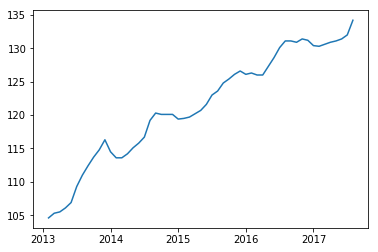

In [25]:
plt.plot(np.linspace(2013+1.0/12, 2017+7.0/12, 55), gi_overall)

In [26]:
print gi_overall

[104.6 105.3 105.5 106.1 106.9 109.3 111.0 112.4 113.7 114.8 116.3 114.5
 113.6 113.6 114.2 115.1 115.8 116.7 119.2 120.3 120.1 120.1 120.1 119.4
 119.5 119.7 120.2 120.7 121.6 123.0 123.6 124.8 125.4 126.1 126.6 126.1
 126.3 126.0 126.0 127.3 128.6 130.1 131.1 131.1 130.9 131.4 131.2 130.4
 130.3 130.6 130.9 131.1 131.4 132.0 134.2]
